# Разведывательный анализ данных датасета Алексея Безгина

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
df = pd.read_csv('./drive/MyDrive/MVD/lab3/AirQuality.csv', sep=';')

In [ ]:
df.shape

(9471, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         545 non-null    float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
dtypes: float64(9), object(2)
memory usage: 814.0+ KB


In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18:00:00     NaN       1360.0     150.0         1046.0    166.0   
1 2004-03-10  19:00:00     2.0       1292.0     112.0          955.0    103.0   
2 2004-03-10  20:00:00     NaN       1402.0      88.0          939.0    131.0   
3 2004-03-10  21:00:00     NaN       1376.0      80.0          948.0    172.0   
4 2004-03-10  22:00:00     NaN       1272.0      51.0          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
0        1056.0    113.0        1692.0       1268.0  
1        1174.0     92.0        1559.0        972.0  
2        1140.0    114.0        1555.0       1074.0  
3        1092.0    122.0        1584.0       1203.0  
4        1205.0    116.0        1490.0       1110.0

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

Date 391
Time 24
CO(GT) 8
PT08.S1(CO) 1041
NMHC(GT) 429
PT08.S2(NMHC) 1245
NOx(GT) 925
PT08.S3(NOx) 1221
NO2(GT) 283
PT08.S4(NO2) 1603
PT08.S5(O3) 1743


In [ ]:
df.isna().mean()

Date             0.012037
Time             0.012037
CO(GT)           0.942456
PT08.S1(CO)      0.050681
NMHC(GT)         0.903495
PT08.S2(NMHC)    0.050681
NOx(GT)          0.185091
PT08.S3(NOx)     0.050681
NO2(GT)          0.185408
PT08.S4(NO2)     0.050681
PT08.S5(O3)      0.050681
dtype: float64

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  545.000000  8991.000000   914.000000    8991.000000  7718.000000   
mean     2.238532  1099.833166   218.811816     939.153376   246.896735   
std      1.363246   217.080037   204.459921     266.831429   212.979168   
min      1.000000   647.000000     7.000000     383.000000     2.000000   
25%      1.000000   937.000000    67.000000     734.500000    98.000000   
50%      2.000000  1063.000000   150.000000     909.000000   180.000000   
75%      3.000000  1231.000000   297.000000    1116.000000   326.000000   
max      8.000000  2040.000000  1189.000000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
count   8991.000000  7715.000000   8991.000000  8991.000000  
mean     835.493605   113.091251   1456.264598  1022.906128  
std      256.817320    48.370108    346.206794   398.484288  
min      322.000000     2.000000    551.000000   221.000000  
25%      658.000000    78.000000   1227.000000   731.500000  
50%      806.000000   109.000000   1463.000000   963.000000  
75%      969.500000   142.000000   1674.000000  1273.500000  
max     2683.000000   340.000000   2775.000000  2523.000000

In [ ]:
type(df['Time'][0])

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         545 non-null    float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 814.0+ KB


In [ ]:
des = pd.DataFrame({'column': df.columns,
                    'type': ['datetime', 'time'] + ['float'] * 9,
                    'scale': ['-', '-'] + ['abs'] * 9})

In [ ]:
for line in des.to_markdown().split('\n'):
  print(line)

|    | column        | type     | scale   |
|---:|:--------------|:---------|:--------|
|  0 | Date          | datetime | -       |
|  1 | Time          | time     | -       |
|  2 | CO(GT)        | float    | abs     |
|  3 | PT08.S1(CO)   | float    | abs     |
|  4 | NMHC(GT)      | float    | abs     |
|  5 | PT08.S2(NMHC) | float    | abs     |
|  6 | NOx(GT)       | float    | abs     |
|  7 | PT08.S3(NOx)  | float    | abs     |
|  8 | NO2(GT)       | float    | abs     |
|  9 | PT08.S4(NO2)  | float    | abs     |
| 10 | PT08.S5(O3)   | float    | abs     |


In [ ]:
# Hypothesis: Air quality has improved over the years.
# Hypothesis: Certain cities have consistently poor air quality compared to others.
# Hypothesis: PM2.5 is the most prominent pollutant affecting air quality.
# Hypothesis: AQI is higher during winter months.
# Hypothesis: AQI is lower on weekends compared to weekdays.
# Hypothesis: AQI is higher in industrial areas compared to residential areas.
# Hypothesis: O3 concentrations are higher during summer months.
# Hypothesis: NO2 concentrations are higher in urban areas compared to rural areas.
# Hypothesis: SO2 concentrations are higher near industrial zones.
# Hypothesis: AQI is influenced by meteorological factors such as temperature and humidity.
# Hypothesis: PM10 concentrations are higher in cities with heavy vehicular traffic.
# Hypothesis: CO concentrations are higher in areas with high industrial emissions.
# Hypothesis: AQI is lower during lockdown periods.
# Hypothesis: AQI is higher during crop burning season in agricultural regions.
# Hypothesis: AQI is influenced by geographical factors such as proximity to mountains or coastlines.
# Hypothesis: AQI is higher during forest fire season in forested regions.

# Разведывательный анализ данных датасета Елизаветы Ивенковой

In [1]:
import pandas as pd

In [2]:
lake = pd.read_csv('beach-weather-stations-automated-sensors-1.csv', sep=',')
lake.describe()

index  Air Temperature  Wet Bulb Temperature      Humidity   
count  59144.000000     59066.000000          38843.000000  59141.000000  \
mean   29571.500000        13.282062             10.643001     69.464517   
std    17073.546497         9.945331              8.965170     15.714691   
min        0.000000       -19.890000            -20.100000     17.000000   
25%    14785.750000         5.500000              4.000000     59.000000   
50%    29571.500000        14.900000             12.100000     71.000000   
75%    44357.250000        21.500000             18.100000     82.000000   
max    59143.000000        34.100000             28.400000    100.000000   

       Rain Intensity  Interval Rain    Total Rain  Precipitation Type   
count    38843.000000   59141.000000  38843.000000        38843.000000  \
mean         0.187591       0.175327    185.445529            4.651932   
std          1.962149       1.300946    231.579782           16.168542   
min          0.000000       0.000000      0.000000            0.000000   
25%          0.000000       0.000000     14.900000            0.000000   
50%          0.000000       0.000000     69.800000            0.000000   
75%          0.000000       0.000000    279.500000            0.000000   
max        183.600000      63.420000   1056.100000           70.000000   

       Wind Direction    Wind Speed  Maximum Wind Speed  Barometric Pressure   
count    59141.000000  59141.000000        59141.000000         58995.000000  \
mean       178.980132      2.969908            4.484584           993.718263   
std        108.124898      6.138399            6.451704             7.044515   
min          0.000000      0.000000            0.000000           964.400000   
25%         86.000000      1.400000            2.400000           989.500000   
50%        196.000000      2.500000            3.800000           993.900000   
75%        271.000000      4.000000            5.900000           998.100000   
max        359.000000    999.900000          999.900000          1019.500000   

       Solar Radiation       Heading  Battery Life  
count     59141.000000  38843.000000  59141.000000  
mean        108.490421    186.236877     13.055144  
std         211.497272    176.452547      1.485712  
min          -6.000000      0.000000     11.600000  
25%           0.000000      1.000000     11.900000  
50%           3.000000    353.000000     12.100000  
75%          96.000000    354.000000     15.100000  
max        1277.000000    359.000000     15.300000

In [17]:
lake.sample(5)

index                Station Name   Measurement Timestamp   
48156  48156      Foster Weather Station  05/29/2017 07:00:00 AM  \
13988  13988  Oak Street Weather Station  12/31/2015 05:00:00 AM   
54093  54093  Oak Street Weather Station  08/24/2017 11:00:00 AM   
39979  39979      Foster Weather Station  02/02/2017 07:00:00 PM   
37244  37244  Oak Street Weather Station  12/24/2016 08:00:00 PM   

       Air Temperature  Wet Bulb Temperature  Humidity  Rain Intensity   
48156            18.00                   NaN      53.0             NaN  \
13988            -2.40                  -3.7      76.0             0.0   
54093            21.10                  16.2      61.0             0.0   
39979            -6.17                   NaN      45.0             NaN   
37244             2.20                   1.3      84.0             0.0   

       Interval Rain  Total Rain  Precipitation Type  Wind Direction   
48156            0.0         NaN                 NaN           207.0  \
13988            0.0         6.3                 0.0           299.0   
54093            0.0       239.3                 0.0            18.0   
39979            0.0         NaN                 NaN           267.0   
37244            0.0       129.3                 0.0           104.0   

       Wind Speed  Maximum Wind Speed  Barometric Pressure  Solar Radiation   
48156         1.8                 2.1                986.5              0.0  \
13988         1.4                 3.1               1001.0              4.0   
54093         3.5                 5.5                997.7            806.0   
39979         4.2                 4.6               1004.7              0.0   
37244         2.6                 4.6               1005.1              3.0   

       Heading  Battery Life Measurement Timestamp Label   
48156      NaN          15.1          05/29/2017 7:00 AM  \
13988    359.0          12.0          12/31/2015 5:00 AM   
54093      3.0          12.1         08/24/2017 11:00 AM   
39979      NaN          15.2          02/02/2017 7:00 PM   
37244      1.0          12.1          12/24/2016 8:00 PM   

                            Measurement ID  
48156     FosterWeatherStation201705290700  
13988  OakStreetWeatherStation201512310500  
54093  OakStreetWeatherStation201708241100  
39979     FosterWeatherStation201702021900  
37244  OakStreetWeatherStation201612242000

|Feature|Dtype|Scale|Description|
|:--|:--|:--|:-------|
|Station Name|String|-|Name of the station where the measurements were taken|
|Measurement Timestamp|DateTime|-|Date and time of the measurement|
|Air Temperature|Float|$^{\circ}$C|Temperature of the air|
|Wet Bulb Temperature|Float|$^{\circ}$C|Temperature of the air when it is saturated with water vapor|
|Humidity|Integer|%|Percent relative humidity|
|Rain Intensity|Float|mm per hour|Intensity of the rain|
|Interval Rain|Float|mm|Amount of rain since the last hourly measurement|
|Total Rain|Float|mm|Total amount of rain since midnight|
|Precipitation Type|Integer|0 = no precipitation; 60 = liquid precipitation; 70 = solid precipitation, 40 = unspecified precipitation|Type of precipitation|
|Wind Direction|Integer|$^{\circ}$|Direction of the wind|
|Wind Speed|Float|meters per second|Speed of the wind at the record time|
|Maximum Wind Speed|Float|abs|Maximum speed of the wind in the 2-minute period immediately preceding the time the record was reported|
|Barometric Pressure|Float|hPa|Barometric pressure|
|Solar Radiation|Float|Watts per square meter|Amount of solar radiation|
|Heading|Integer|-|The current heading of the wind-measurement unit. The accurate measurements value is 0 (true north), and unit is manually adjusted, as necessary, to keep it close to this heading|
|Battery Life|Float|Volt|Battery voltage, indicator of remaining battery life|
|Measurement Timestamp Label|String|-|Label for the measurement timestamp|
|Measurment ID|String|-|A unique record ID|

### Описание датасета

*link:* https://www.kaggle.com/datasets/thedevastator/automated-lake-michigan-beach-weather-measuremen

В датасете находятся данные о состоянии атмосферы, измеряемые автоматическими датчиками, размещенными вокруг берега озера Мичиган. Измерения проводятся с мая по сентябрь каждого года.

**Местоположение считывающих датчиков:** https://data.cityofchicago.org/Parks-Recreation/Beach-Water-and-Weather-Sensor-Locations/g3ip-u8rb

**Источник датасета  на Kaggle:** https://data.cityofchicago.org/Parks-Recreation/Beach-Weather-Stations-Automated-Sensors/k7hf-8y75/data

### Для каких задач подойдет датасет?
- визуализация исторических трендов в погодных условиях может быть полезна градостроителям и исследователям в понимании природы пляжных районов
- обучающий датасет для создания моделей, предсказывающих погоду
- сравнение локаций друг с другом для планирования событий и активностей в их окрестностях
- изучение погодных условий в динамике для (не)выявления локальных изменений климата

In [4]:
len(lake['Rain Intensity'].unique())


67

In [12]:
print('ratio of empty data for each column:')
print()
L = lake.shape[0]
for col in lake.columns:
    print(f'{col}: {round(lake[col].isna().sum() / L * 100, 2)} %')


ratio of empty data for each column:

index: 0.0 %
Station Name: 0.0 %
Measurement Timestamp: 0.01 %
Air Temperature: 0.13 %
Wet Bulb Temperature: 34.32 %
Humidity: 0.01 %
Rain Intensity: 34.32 %
Interval Rain: 0.01 %
Total Rain: 34.32 %
Precipitation Type: 34.32 %
Wind Direction: 0.01 %
Wind Speed: 0.01 %
Maximum Wind Speed: 0.01 %
Barometric Pressure: 0.25 %
Solar Radiation: 0.01 %
Heading: 34.32 %
Battery Life: 0.01 %
Measurement Timestamp Label: 0.01 %
Measurement ID: 0.0 %


In [13]:
import missingno as msno

<Axes: >

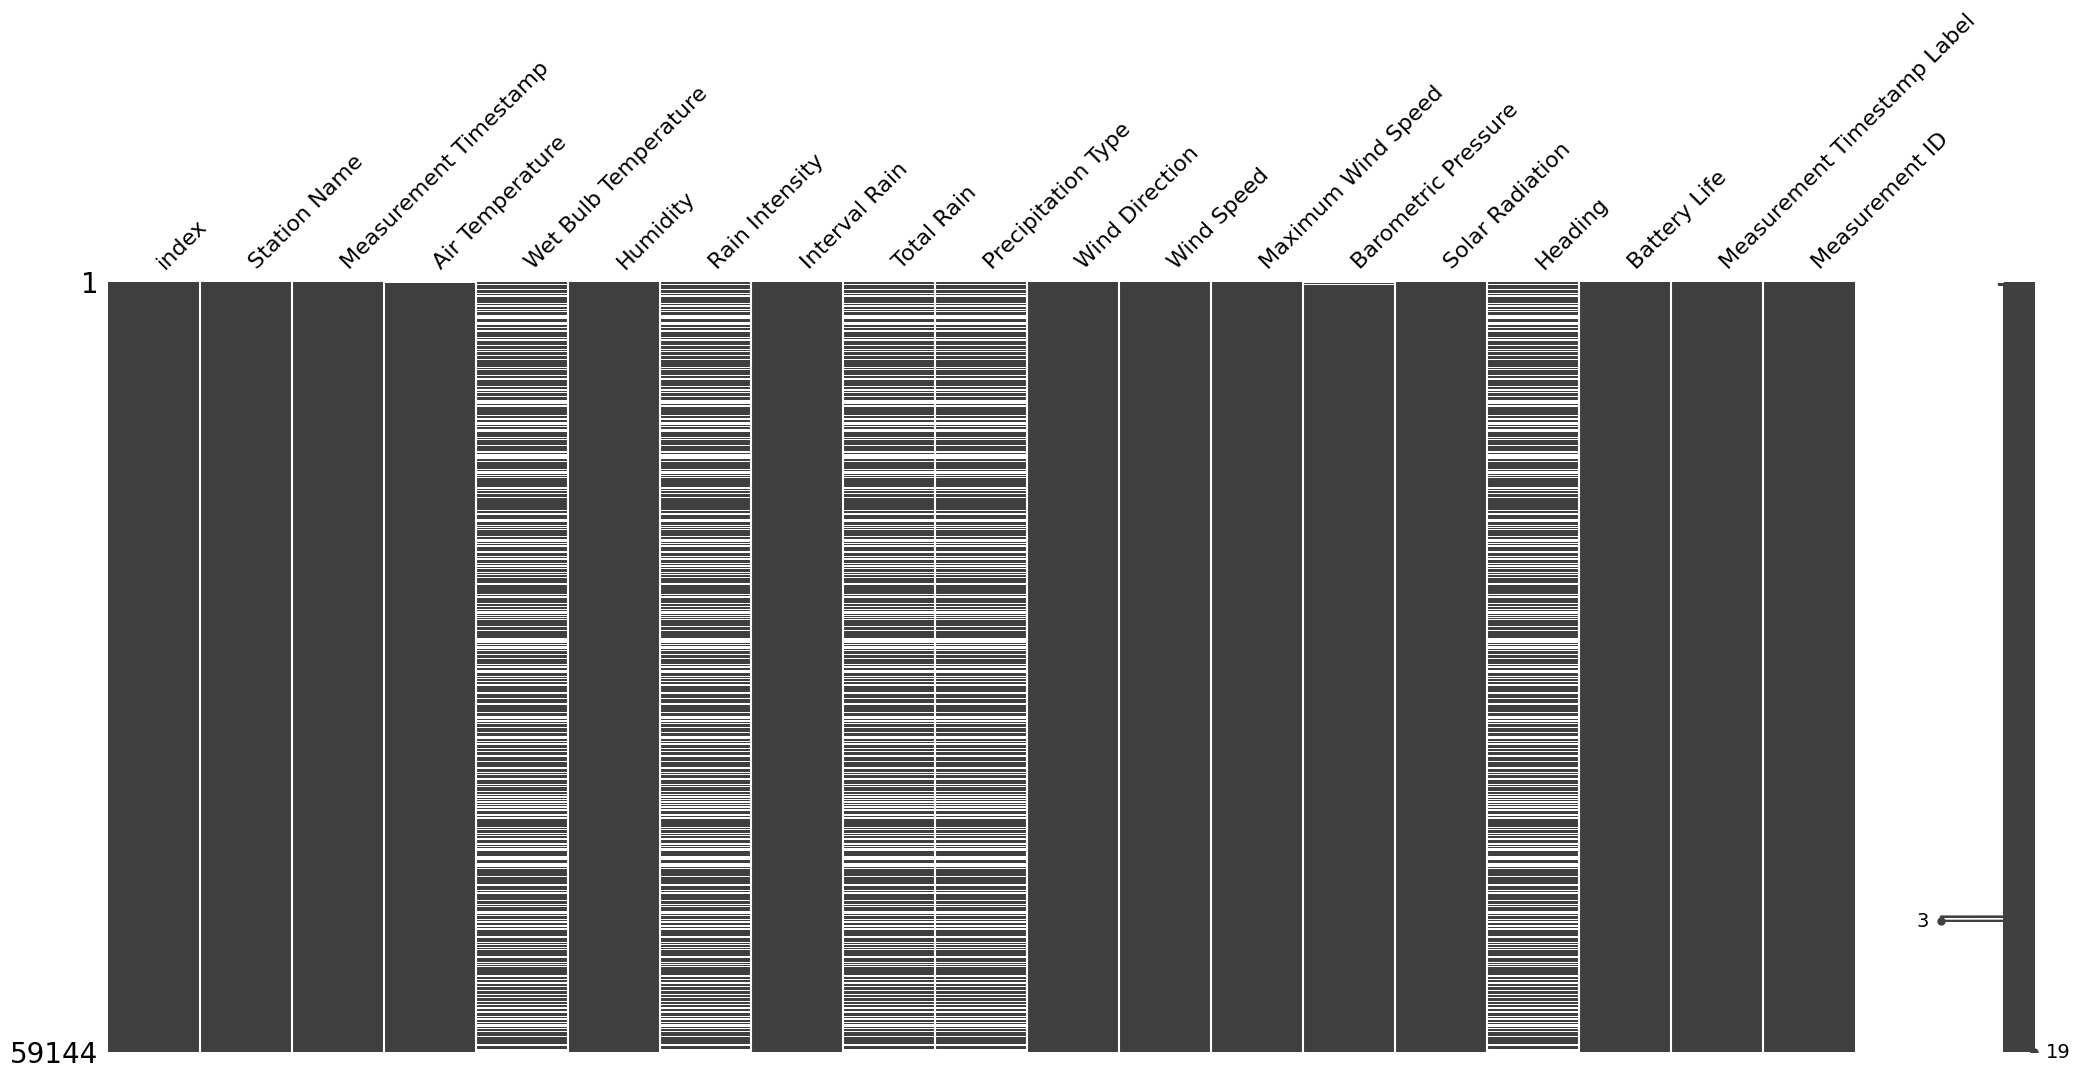

In [14]:
msno.matrix(lake)

In [19]:
lake['Heading'].sum()

7233999.0

# Разведывательный анализ и подготовка данных Всеволода Козлова

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
sns.set()

## Импорт данных

In [2]:
df_main = pd.read_csv('climate_change_data/API_19_DS2_en_csv_v2_5361599.csv', sep=',', skiprows=4)
df_main = df_main.iloc[:, :-1]

id_columns = ['Country Name',
              'Country Code',
              'Indicator Name',
              'Indicator Code']
df_main = pd.melt(df_main, id_vars=id_columns,
                  var_name='Year',
                  value_name='Value')
df_main['Year'] = pd.to_numeric(df_main['Year'])
df_main

Country Name Country Code  \
0              Aruba          ABW   
1              Aruba          ABW   
2              Aruba          ABW   
3              Aruba          ABW   
4              Aruba          ABW   
...              ...          ...   
1253387     Zimbabwe          ZWE   
1253388     Zimbabwe          ZWE   
1253389     Zimbabwe          ZWE   
1253390     Zimbabwe          ZWE   
1253391     Zimbabwe          ZWE   

                                            Indicator Name     Indicator Code  \
0                 Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
1                                         Urban population        SP.URB.TOTL   
2                       Urban population growth (annual %)        SP.URB.GROW   
3                                        Population, total        SP.POP.TOTL   
4                             Population growth (annual %)        SP.POP.GROW   
...                                                    ...                ...   
1253387  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.ZS   
1253388  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1253389                       Arable land (% of land area)     AG.LND.ARBL.ZS   
1253390                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
1253391                         Agricultural land (sq. km)     AG.LND.AGRI.K2   

         Year      Value  
0        1960     50.776  
1        1960  27728.000  
2        1960        NaN  
3        1960  54608.000  
4        1960        NaN  
...       ...        ...  
1253387  2021        NaN  
1253388  2021        NaN  
1253389  2021        NaN  
1253390  2021        NaN  
1253391  2021        NaN  

[1253392 rows x 6 columns]

In [3]:
meta_country_df = pd.read_csv('climate_change_data/Metadata_Country_API_19_DS2_en_csv_v2_5361599.csv')
meta_country_df = meta_country_df.iloc[:, :-1]

In [4]:
meta_indicators_df = pd.read_csv('climate_change_data/Metadata_Indicator_API_19_DS2_en_csv_v2_5361599.csv')
meta_indicators_df.columns = meta_indicators_df.columns.str.lower()
meta_indicators_df.sort_values(['indicator_code'], inplace=True)
meta_indicators_df = meta_indicators_df.reset_index(drop=True)
meta_indicators_df = meta_indicators_df.iloc[:, :-1]

## Что за данные? Анализ метаданных

### country

In [5]:
meta_country_df

Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa           Low income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stretching from the Red Sea in t...   
2    The reporting period for national accounts dat...   
3    22 countries, stretching from the westernmost ...   
4    The World Bank systematically assesses the app...   
..                                                 ...   
260                                                NaN   
261  The World Bank systematically assesses the app...   
262  Fiscal year end: March 31; reporting period fo...   
263  National accounts data were rebased to reflect...   
264  National Accounts data are reported in Zimbabw...   

                       TableName  
0                          Aruba  
1    Africa Eastern and Southern  
2                    Afghanistan  
3     Africa Western and Central  
4                         Angola  
..                           ...  
260                       Kosovo  
261                  Yemen, Rep.  
262                 South Africa  
263                       Zambia  
264                     Zimbabwe  

[265 rows x 5 columns]

Заметим, что здесь имеются не только страны, но и агрегации стран
По территориальному признаку:
* Africa Eastern and Southern
* Africa Western and Central
* World


У таких показателей стоят Nan в IncomeGroup

In [6]:
income_nan_mask = meta_country_df['IncomeGroup'].isna()
meta_country_df[income_nan_mask]

Country Code                     Region IncomeGroup  \
1            AFE                        NaN         NaN   
3            AFW                        NaN         NaN   
7            ARB                        NaN         NaN   
36           CEB                        NaN         NaN   
49           CSS                        NaN         NaN   
61           EAP                        NaN         NaN   
62           EAR                        NaN         NaN   
63           EAS                        NaN         NaN   
64           ECA                        NaN         NaN   
65           ECS                        NaN         NaN   
68           EMU                        NaN         NaN   
73           EUU                        NaN         NaN   
74           FCS                        NaN         NaN   
95           HIC                        NaN         NaN   
98           HPC                        NaN         NaN   
102          IBD                        NaN         NaN   
103          IBT                        NaN         NaN   
104          IDA                        NaN         NaN   
105          IDB                        NaN         NaN   
107          IDX                        NaN         NaN   
127          LAC                        NaN         NaN   
133          LCN                        NaN         NaN   
134          LDC                        NaN         NaN   
135          LIC                        NaN         NaN   
138          LMC                        NaN         NaN   
139          LMY                        NaN         NaN   
141          LTE                        NaN         NaN   
152          MEA                        NaN         NaN   
155          MIC                        NaN         NaN   
160          MNA                        NaN         NaN   
169          NAC                        NaN         NaN   
180          OED                        NaN         NaN   
182          OSS                        NaN         NaN   
190          PRE                        NaN         NaN   
196          PSS                        NaN         NaN   
197          PST                        NaN         NaN   
203          SAS                        NaN         NaN   
214          SSA                        NaN         NaN   
216          SSF                        NaN         NaN   
217          SST                        NaN         NaN   
229          TEA                        NaN         NaN   
230          TEC                        NaN         NaN   
235          TLA                        NaN         NaN   
237          TMN                        NaN         NaN   
239          TSA                        NaN         NaN   
240          TSS                        NaN         NaN   
248          UMC                        NaN         NaN   
253          VEN  Latin America & Caribbean         NaN   
258          WLD                        NaN         NaN   

                                          SpecialNotes  \
1    26 countries, stretching from the Red Sea in t...   
3    22 countries, stretching from the westernmost ...   
7    Arab World aggregate. Arab World is composed o...   
36           Central Europe and the Baltics aggregate.   
49                                                 NaN   
61                                                 NaN   
62   Early-dividend countries are mostly lower-midd...   
63   East Asia and Pacific regional aggregate (incl...   
64                                                 NaN   
65   Europe and Central Asia regional aggregate (in...   
68                                Euro area aggregate.   
73                           European Union aggregate.   
74   Fragile and conflict-affected situations aggre...   
95   High income group aggregate. High-income econo...   
98   The Heavily Indebted Poor Countries (HIPC) ref...   
102                         IBRD only group aggregate.   
103  IDA and IBRD total group aggregate (includes I...   
104  IDA 

In [7]:
region_nan_mask = meta_country_df['Region'].isna()
meta_country_df[region_nan_mask]

Country Code Region IncomeGroup  \
1            AFE    NaN         NaN   
3            AFW    NaN         NaN   
7            ARB    NaN         NaN   
36           CEB    NaN         NaN   
49           CSS    NaN         NaN   
61           EAP    NaN         NaN   
62           EAR    NaN         NaN   
63           EAS    NaN         NaN   
64           ECA    NaN         NaN   
65           ECS    NaN         NaN   
68           EMU    NaN         NaN   
73           EUU    NaN         NaN   
74           FCS    NaN         NaN   
95           HIC    NaN         NaN   
98           HPC    NaN         NaN   
102          IBD    NaN         NaN   
103          IBT    NaN         NaN   
104          IDA    NaN         NaN   
105          IDB    NaN         NaN   
107          IDX    NaN         NaN   
127          LAC    NaN         NaN   
133          LCN    NaN         NaN   
134          LDC    NaN         NaN   
135          LIC    NaN         NaN   
138          LMC    NaN         NaN   
139          LMY    NaN         NaN   
141          LTE    NaN         NaN   
152          MEA    NaN         NaN   
155          MIC    NaN         NaN   
160          MNA    NaN         NaN   
169          NAC    NaN         NaN   
180          OED    NaN         NaN   
182          OSS    NaN         NaN   
190          PRE    NaN         NaN   
196          PSS    NaN         NaN   
197          PST    NaN         NaN   
203          SAS    NaN         NaN   
214          SSA    NaN         NaN   
216          SSF    NaN         NaN   
217          SST    NaN         NaN   
229          TEA    NaN         NaN   
230          TEC    NaN         NaN   
235          TLA    NaN         NaN   
237          TMN    NaN         NaN   
239          TSA    NaN         NaN   
240          TSS    NaN         NaN   
248          UMC    NaN         NaN   
258          WLD    NaN         NaN   

                                          SpecialNotes  \
1    26 countries, stretching from the Red Sea in t...   
3    22 countries, stretching from the westernmost ...   
7    Arab World aggregate. Arab World is composed o...   
36           Central Europe and the Baltics aggregate.   
49                                                 NaN   
61                                                 NaN   
62   Early-dividend countries are mostly lower-midd...   
63   East Asia and Pacific regional aggregate (incl...   
64                                                 NaN   
65   Europe and Central Asia regional aggregate (in...   
68                                Euro area aggregate.   
73                           European Union aggregate.   
74   Fragile and conflict-affected situations aggre...   
95   High income group aggregate. High-income econo...   
98   The Heavily Indebted Poor Countries (HIPC) ref...   
102                         IBRD only group aggregate.   
103  IDA and IBRD total group aggregate (includes I...   
104  IDA total group aggregate (includes IDA only a...   
105                         IDA blend group aggregate.   
107                          IDA only group aggregate.   
127                                                NaN   
133                                                NaN   
134                                                NaN   
135  Low income group aggregate. Low-income economi...   
138  Lower middle income group aggregate. Lower-mid...   
139  Low and middle-income group aggregate. Low and...   
141  Late-dividend countries are mostly upper middl...   
152  Middle East and North Africa regional aggregat...   
155  Middle income group aggregate. Middle-income e...   
160                                                NaN   
169  North America regional aggregate. There are no...   
180                                                NaN   
182                                                NaN   
190  Pre-dividend countries are mostly low-income c...   
196             Pacific island small states aggregate.   
197 

In [8]:
a = region_nan_mask
b = income_nan_mask
both_nan = (a | b) & ~(a & b)
meta_country_df[both_nan]

Country Code                     Region IncomeGroup SpecialNotes  \
253          VEN  Latin America & Caribbean         NaN          NaN   

         TableName  
253  Venezuela, RB

Единственная "страна", у которой толькок один Nan - это Venezuela. У нее нет IncomeGroup, но есть регион.

Вывод: если region - nan, то это не страна, агрегация

In [9]:
# Запишем Названия в таблице для стран, которые на самом деле не являются агрегациями
aggregate_cols = meta_country_df.loc[region_nan_mask, 'TableName']
aggregate_cols

1                            Africa Eastern and Southern
3                             Africa Western and Central
7                                             Arab World
36                        Central Europe and the Baltics
49                                Caribbean small states
61           East Asia & Pacific (excluding high income)
62                            Early-demographic dividend
63                                   East Asia & Pacific
64         Europe & Central Asia (excluding high income)
65                                 Europe & Central Asia
68                                             Euro area
73                                        European Union
74              Fragile and conflict affected situations
95                                           High income
98                Heavily indebted poor countries (HIPC)
102                                            IBRD only
103                                     IDA & IBRD total
104                            

In [10]:
union_aggregate = {'Arab World',
               'European Union'
               'IBRD only',
               'IDA & IBRD total',
                'IBRD only',
               'IDA total',
               'IDA blend',
               'IDA only',
               'OECD members'}


poor_aggregate = {
            'Fragile and conflict affected situations',
            'Heavily indebted poor countries (HIPC)',
            'Least developed countries: UN classification'}

income_aggregate = {'Low income',
                    'Lower middle income',
                    'Low & middle income',
                    'Upper middle income',
                    'Middle income',
                    'High income'}

dividend_aggregate = {'Early-demographic dividend',
                      'Late-demographic dividend',
                      'Pre-demographic dividend',
                      'Post-demographic dividend'}

all_without_region = union_aggregate.union(poor_aggregate).union(income_aggregate).union(dividend_aggregate)


region_aggregate = set(aggregate_cols.to_list()).difference(all_without_region)
region_aggregate

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Latin America & Caribbean',
 'Latin America & Caribbean (IDA & IBRD)',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD)',
 'Sub-Saharan Africa (excluding high income)',
 'World'}

### indicators

In [11]:
meta_indicators_df

indicator_code                                     indicator_name  \
0      AG.LND.AGRI.K2                         Agricultural land (sq. km)   
1      AG.LND.AGRI.ZS                 Agricultural land (% of land area)   
2      AG.LND.ARBL.ZS                       Arable land (% of land area)   
3   AG.LND.EL5M.RU.K2  Rural land area where elevation is below 5 met...   
4   AG.LND.EL5M.RU.ZS  Rural land area where elevation is below 5 met...   
..                ...                                                ...   
71        SP.POP.GROW                       Population growth (annual %)   
72        SP.POP.TOTL                                  Population, total   
73        SP.URB.GROW                 Urban population growth (annual %)   
74        SP.URB.TOTL                                   Urban population   
75  SP.URB.TOTL.IN.ZS           Urban population (% of total population)   

                                          source_note  \
0   Agricultural land refers to the share of land ...   
1   Agricultural land refers to the share of land ...   
2   Arable land includes land defined by the FAO a...   
3   Rural land area below 5m is the total rural la...   
4   Rural land area below 5m is the percentage of ...   
..                                                ...   
71  Annual population growth rate for year t is th...   
72  Total population is based on the de facto defi...   
73  Urban population refers to people living in ur...   
74  Urban population refers to people living in ur...   
75  Urban population refers to people living in ur...   

                                  source_organization  
0   Food and Agriculture Organization, electronic ...  
1   Food and Agriculture Organization, electronic ...  
2   Food and Agriculture Organization, electronic ...  
3   Center for International Earth Science Informa...  
4   Center for International Earth Science Informa...  
..                                                ...  
71  Derived from total population. Population sour...  
72  (1) United Nations Population Division. World ...  
73  World Bank staff estimates based on the United...  
74  World Bank staff estimates based on the United...  
75  United Nations Population Division. World Urba...  

[76 rows x 4 columns]

По indcator_code можно Понять к какой категории относится метрика.
* AG - Agticulture
* BX - Инвестиции в страну
* NV - Влад зеленого бизнеса в экономику
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статисткиа популяции
    * POP - популяция в целом
    * URB - урбанизация
* SI - бедность

Кластеризуем



Метрики достатка:

* AG - возможности и использование земледелия
* BX - Инвестиции в страну
* NV - Вклад Agriculture, forestry, and fishing в % от ВВП
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статистка популяции
    * POP - популяция в целом
    * URB - урбанизация

Метрики потребления:
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование

Метрики загрязнения:
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация

### Вывод по метаданным

-Для каждой категории имеется много метрик. Надо определить наиболее полезные из них по семантике и отсутсвию пустых значений

-Отделить агрегированные данные от данных по конкретным странам

## Выбор данных годов, метрик и стран на основании отсутствующих значений и полезности метрик

In [12]:
def metrics_with_code(codes):
    mask = meta_indicators_df.str.contains(codes[0])
    for code in codes[1:]:
        mask |= meta_indicators_df.str.contains(code)
    return meta_country_df.loc[mask, 'indicator_code']

### Выбор года

Text(0, 0.5, 'Количество nan')

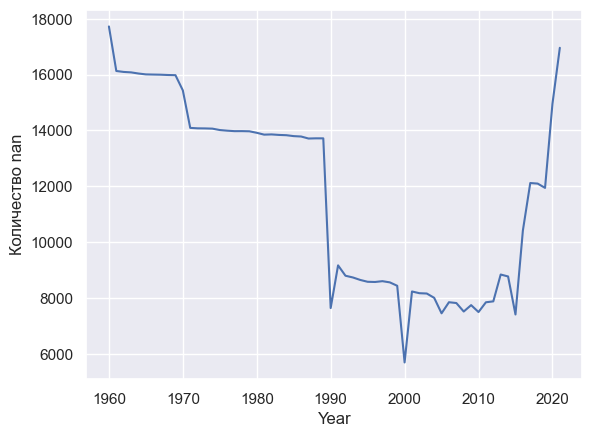

In [13]:
nans_cnt = df_main.groupby('Year').apply(lambda x: x['Value'].isna().sum())
sns.lineplot(nans_cnt)
plt.ylabel('Количество nan')

Так как данных меньше всего с 1990 по 2012, то ограничимся ими

In [14]:
mask = (df_main['Year'] >= 1990) & (df_main['Year'] <= 2012)
df_main = df_main[mask]

### Выбор метрик

In [15]:
df_main

Country Name Country Code  \
606480         Aruba          ABW   
606481         Aruba          ABW   
606482         Aruba          ABW   
606483         Aruba          ABW   
606484         Aruba          ABW   
...              ...          ...   
1071443     Zimbabwe          ZWE   
1071444     Zimbabwe          ZWE   
1071445     Zimbabwe          ZWE   
1071446     Zimbabwe          ZWE   
1071447     Zimbabwe          ZWE   

                                            Indicator Name     Indicator Code  \
606480            Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
606481                                    Urban population        SP.URB.TOTL   
606482                  Urban population growth (annual %)        SP.URB.GROW   
606483                                   Population, total        SP.POP.TOTL   
606484                        Population growth (annual %)        SP.POP.GROW   
...                                                    ...                ...   
1071443  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.ZS   
1071444  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1071445                       Arable land (% of land area)     AG.LND.ARBL.ZS   
1071446                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
1071447                         Agricultural land (sq. km)     AG.LND.AGRI.K2   

         Year          Value  
606480   1990      50.319000  
606481   1990   33066.000000  
606482   1990       1.683480  
606483   1990   65712.000000  
606484   1990       1.712907  
...       ...            ...  
1071443  2012            NaN  
1071444  2012            NaN  
1071445  2012      10.339925  
1071446  2012      41.876696  
1071447  2012  162000.000000  

[464968 rows x 6 columns]

In [16]:
#nans_cnt = df_main.groupby('Indicator Name').apply(lambda x: x['Value'].isna().sum())
nans_cnt.sort_values(inplace=True)
nans_cnt.reset_index(name='nans cnt')

Year  nans cnt
0   2000      5688
1   2015      7406
2   2005      7448
3   2010      7493
4   2008      7512
..   ...       ...
57  1963     16077
58  1962     16093
59  1961     16127
60  2021     16957
61  1960     17722

[62 rows x 2 columns]

Какие метрики оставим?


**Energy**:

"Renewable electricity output (% of total electricity output)",
"Energy use (kg of oil equivalent per capita)",
"Electric power consumption (kWh per capita)",
"Electricity production from renewable sources, excluding hydroelectric (kWh)",
"Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)"


**Population**:
"Population, total",
"Population growth (annual %)",
"Urban population (% of total population)",
"Urban population growth (annual %)"

**Economics**:
"Foreign direct investment, net inflows (% of GDP)",
"Mortality rate, under-5 (per 1,000 live births)",

**Agriculture**:
"Agricultural land (% of land area)",
"Forest area (% of land area)",
"Arable land (% of land area)",
"Agriculture, forestry, and fishing, value added (% of GDP)",

**Atmosphere emissions**:
"Methane emissions (kt of CO2 equivalent)",
"Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
"CO2 emissions (metric tons per capita)",
"CO2 emissions from liquid fuel consumption (% of total)",
"CO2 emissions from solid fuel consumption (% of total)",
"CO2 emissions from gaseous fuel consumption (% of total)",

Оставим только выбранные метрики

In [17]:
selected_metrics = ["Renewable electricity output (% of total electricity output)",
                    "Energy use (kg of oil equivalent per capita)",
                    "Electric power consumption (kWh per capita)",
                    "Electricity production from renewable sources, excluding hydroelectric (kWh)",
                    "Electricity production from coal sources (% of total)",
                    "Electricity production from hydroelectric sources (% of total)",
                    "Electricity production from natural gas sources (% of total)",
                    "Electricity production from nuclear sources (% of total)",
                    "Electricity production from oil sources (% of total)",
                    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
                    "Population, total",
                    "Population growth (annual %)",
                    "Urban population (% of total population)",
                    "Urban population growth (annual %)",
                    "Foreign direct investment, net inflows (% of GDP)",
                    "Mortality rate, under-5 (per 1,000 live births)",
                    "Agricultural land (% of land area)",
                    "Forest area (% of land area)",
                    "Arable land (% of land area)",
                    "Agriculture, forestry, and fishing, value added (% of GDP)",
                    "Methane emissions (kt of CO2 equivalent)",
                    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
                    "Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
                    "CO2 emissions (metric tons per capita)",
                    "CO2 emissions from liquid fuel consumption (% of total)",
                    "CO2 emissions from solid fuel consumption (% of total)",
                    "CO2 emissions from gaseous fuel consumption (% of total)"]

In [18]:
df_main = df_main[df_main['Indicator Name'].isin(selected_metrics)]
meta_indicators_df = meta_indicators_df[meta_indicators_df['indicator_name'].isin(selected_metrics)]

## Вывод по подготовке

**Откуда взяты данные?**
[The World Bank](https://data.worldbank.org/topic/19)

**Какие данные имеем?**
Имеем данные по странам и агрегациям стран за годы с 1990 по 2012. Для каждой пары страна-год имеем набор метрик.
Метрики можно отнести к типам:
* Загрязненность атмосферы
* Экономические метрики
* Развитость сельского хозяйства и "зеленость" страны
* Потребление и способы добычи энергии
* Городское и сельское население страны

Все метрики перечислены в предыдущем пункте. Тип данных - float. В названии описана величина и единицы измерения


**Для чего можно использовать данные?**
* Наблюдение динамики по миру
    * Как изменилась экологическая обстановка за 20 лет?
    * Темпы роста урбанизации за 20 лет
* Наблюдение динамика в рамках одной страны
    * Как менялось экономическое положение страны, а вместе с этим вред окружающей среде?
* Выявление факторов, косвенно влияющих на экологию
    *  Какая взаимосвязь между развитием сельского хозяйства и вреда экологии?
    * Можем ли мы говорить, что более бедные страны более экологичны
    * Является ли высокий уровень урбанизации причиной высокого выброса CO2 в атмосферу?
    * Являются ли страны с традиционными методами земледелия более экологичными?


## Переименовывание столбцов

In [19]:
cols = ['country_name', 'country_code', 'indicator_name', 'indicator_code', 'year', 'value']
df_main.columns = cols
df_main

country_name country_code  \
606480         Aruba          ABW   
606482         Aruba          ABW   
606483         Aruba          ABW   
606484         Aruba          ABW   
606488         Aruba          ABW   
...              ...          ...   
1071432     Zimbabwe          ZWE   
1071434     Zimbabwe          ZWE   
1071438     Zimbabwe          ZWE   
1071445     Zimbabwe          ZWE   
1071446     Zimbabwe          ZWE   

                                            indicator_name  \
606480            Urban population (% of total population)   
606482                  Urban population growth (annual %)   
606483                                   Population, total   
606484                        Population growth (annual %)   
606488     Mortality rate, under-5 (per 1,000 live births)   
...                                                    ...   
1071432  Electricity production from coal sources (% of...   
1071434  Foreign direct investment, net inflows (% of GDP)   
1071438                       Forest area (% of land area)   
1071445                       Arable land (% of land area)   
1071446                 Agricultural land (% of land area)   

               indicator_code  year         value  
606480      SP.URB.TOTL.IN.ZS  1990     50.319000  
606482            SP.URB.GROW  1990      1.683480  
606483            SP.POP.TOTL  1990  65712.000000  
606484            SP.POP.GROW  1990      1.712907  
606488            SH.DYN.MORT  1990           NaN  
...                       ...   ...           ...  
1071432        EG.ELC.COAL.ZS  2012     39.052483  
1071434  BX.KLT.DINV.WD.GD.ZS  2012      2.044131  
1071438        AG.LND.FRST.ZS  2012     46.046633  
1071445        AG.LND.ARBL.ZS  2012     10.339925  
1071446        AG.LND.AGRI.ZS  2012     41.876696  

[165186 rows x 6 columns]

## Создание сводной таблицы

In [20]:
df_pivot = pd.pivot_table(df_main,
                       index=['country_name','country_code', 'year'],
                       columns='indicator_code',
                       values=['value'])
df_pivot = df_pivot.reset_index()
cols = list(df_pivot.columns.get_level_values(1))
cols[:3] = ['country_name', 'country_code', 'year']
df_pivot.columns = cols
df_pivot

country_name country_code  year  AG.LND.AGRI.ZS  AG.LND.ARBL.ZS  \
0     Afghanistan          AFG  1990       58.322984       12.127624   
1     Afghanistan          AFG  1991       58.307652       12.127624   
2     Afghanistan          AFG  1992       58.307652       12.127624   
3     Afghanistan          AFG  1993       58.160465       11.995768   
4     Afghanistan          AFG  1994       57.974947       11.810251   
...           ...          ...   ...             ...             ...   
6090     Zimbabwe          ZWE  2008       42.522942       10.986170   
6091     Zimbabwe          ZWE  2009       42.135195       10.598423   
6092     Zimbabwe          ZWE  2010       41.876696       10.339925   
6093     Zimbabwe          ZWE  2011       42.393693       10.856921   
6094     Zimbabwe          ZWE  2012       41.876696       10.339925   

      AG.LND.FRST.ZS  BX.KLT.DINV.WD.GD.ZS  EG.ELC.COAL.ZS  EG.ELC.HYRO.ZS  \
0           1.852782                   NaN             NaN             NaN   
1           1.852782                   NaN             NaN             NaN   
2           1.852782                   NaN             NaN             NaN   
3           1.852782                   NaN             NaN             NaN   
4           1.852782                   NaN             NaN             NaN   
...              ...                   ...             ...             ...   
6090       46.522993              1.168557       23.711475       74.859016   
6091       46.403903              1.086305       24.070772       74.859416   
6092       46.284813              1.018022       31.713791       66.924409   
6093       46.165723              2.441511       41.655816       56.434462   
6094       46.046633              2.044131       39.052483       58.567858   

      EG.ELC.NGAS.ZS  ...  EN.ATM.CO2E.SF.ZS  EN.ATM.GHGO.KT.CE  \
0                NaN  ...           9.415270         935.064407   
1                NaN  ...           9.100584         765.938263   
2                NaN  ...           1.538601        -263.076820   
3                NaN  ...           1.348162        -325.709000   
4                NaN  ...           1.128308        -650.316902   
...              ...  ...                ...                ...   
6090             0.0  ...          78.454500         -30.492310   
6091             0.0  ...          46.227858        -532.520508   
6092             0.0  ...          57.528165         608.506409   
6093             0.0  ...          50.999704        1469.966370   
6094             0.0  ...          28.403353        1827.732117   

      EN.ATM.METH.KT.CE  EN.ATM.NOXE.KT.CE  NV.AGR.TOTL.ZS  SH.DYN.MORT  \
0           6739.999771             2840.0             NaN        178.5   
1           7019.999981             2930.0             NaN        172.2   
2           7130.000114             2890.0             NaN        166.3   
3           7210.000038             2930.0             NaN        160.8   
4           7469.999790             2760.0             NaN        155.5   
...                 ...                ...             ...          ...   
6090       11369.999886             5360.0       19.021074         94.7   
6091       11829.999924             5770.0       10.742550         91.3   
6092       12270.000458             6120.0        9.609863         86.1   
6093       12640.000343             6260.0        8.665865         80.6   
6094       12460.000038             5800.0        8.044518         72.1   

      SP.POP.GROW  SP.POP.TOTL  SP.URB.GROW  SP.URB.TOTL.IN.ZS  
0        0.202434   10694796.0     0.623574             21.177  
1        0.469880   10745167.0     0.889255             21.266  
2       11.522524   12057433.0    11.940176             21.355  
3       14.964455   14003760.0    15.380336             21.444  
4        9.864262   15455555.0    10.283085             21.534  
...           ...          ...          ...                ...  
6090     0.798207   12550347.0     0.25438

## Добавление столбца income_group

In [21]:
income_data = meta_country_df[['Country Code', 'IncomeGroup']]
df_pivot = df_pivot.merge(income_data,
               how='left',
               left_on='country_code',
               right_on='Country Code')
df_pivot.drop('Country Code', axis=1, inplace=True)

# Проработка гипотез Всеволод Козлов

1. Чем больше темпы роста урбанизации страны, тем больше выброс CO2 в атмосферу
2. Страны, использующие ядерную энергетику, создают меньше выбросов в атмосферу
3. Низкое соотношения вспахиваемых земель к плодородным землям свидетельствует о низком доходе населения и высокой детской смертности
4. Чем больше вклад земледелия, лесоводства в ВВП, тем выше загрязнение окружающей среды
5. Что больше выработка электричества из возобновляемых источников энергия, тем меньше вклад земледелия и лесоводства в ВВП
6. Восточная Азия является мировым лидером по выбросу CO2
7. Количество иностранные инвестиции коррелирует с количеством выбросов в атмосферу

## Чем больше темпы роста урбанизации страны, тем больше выброс CO2 в атмосферу

### Статистика по миру

In [22]:
wrld = df_pivot[df_pivot['country_name'] == 'World']
wrld

country_name country_code  year  AG.LND.AGRI.ZS  AG.LND.ARBL.ZS  \
6003        World          WLD  1990       37.120737       10.561578   
6004        World          WLD  1991       37.151990       10.586790   
6005        World          WLD  1992       37.189539       10.537196   
6006        World          WLD  1993       37.065197       10.548052   
6007        World          WLD  1994       37.228287       10.519334   
6008        World          WLD  1995       37.204019       10.513327   
6009        World          WLD  1996       37.267015       10.505132   
6010        World          WLD  1997       37.402532       10.531852   
6011        World          WLD  1998       37.510027       10.524854   
6012        World          WLD  1999       37.532322       10.536105   
6013        World          WLD  2000       37.551572       10.497263   
6014        World          WLD  2001       37.568891       10.481106   
6015        World          WLD  2002       37.479819       10.455377   
6016        World          WLD  2003       37.357041       10.501138   
6017        World          WLD  2004       37.013115       10.515447   
6018        World          WLD  2005       37.063804       10.531882   
6019        World          WLD  2006       37.057094       10.512498   
6020        World          WLD  2007       36.996398       10.506184   
6021        World          WLD  2008       36.902595       10.504986   
6022        World          WLD  2009       36.872388       10.521760   
6023        World          WLD  2010       36.877799       10.537539   
6024        World          WLD  2011       37.026376       10.607903   
6025        World          WLD  2012       36.629367       10.653105   

      AG.LND.FRST.ZS  BX.KLT.DINV.WD.GD.ZS  EG.ELC.COAL.ZS  EG.ELC.HYRO.ZS  \
6003       31.624509              1.093011       36.985264       17.918716   
6004       31.568815              0.768438       37.053101       18.075499   
6005       31.620467              0.741586       37.388138       17.904517   
6006       31.565509              0.906373       37.356879       18.517733   
6007       31.512496              1.002812       37.506542       18.233558   
6008       31.457344              1.174514       37.330923       18.525853   
6009       31.401586              1.317385       37.943686       18.196360   
6010       31.329022              1.676192       38.000622       18.033549   
6011       31.279438              2.493695       37.800854       17.653532   
6012       31.221965              3.655484       37.626143       17.204456   
6013       31.170690              4.609009       38.613925       16.798581   
6014       31.135820              2.660638       38.426045       16.300243   
6015       31.101204              2.139753       38.729416       16.097353   
6016       31.066090              1.860544       39.809076       15.599727   
6017       31.031363              2.228346       39.358164       15.884300   
6018       30.996238              3.280401       39.833621       15.888624   
6019       30.971231              4.252599       40.491909       15.865373   
6020       30.945030              5.326042       41.114534       15.393423   
6021       30.922605              3.791808       40.611889       15.729531   
6022       30.896748              2.319239       39.995219       16.061358   
6023       30.869964              2.840969       40.087189       15.872421   
6024       30.844389              3.154931       40.978071       15.694732   
6025       30.819847              2.657490       40.254636       16.052857   

      EG.ELC.NGAS.ZS  ...  EN.ATM.GHGO.KT.CE  EN.ATM.METH.KT.CE  \
6003       14.722526  ...      -1.023697e+06       6.517150e+06   
6004       14.616590  ...      -9.594176e+05       6.535280e+06   
6005       14.599304  ...      -8.674753e+05       6.515270e+06   
6006       14.703464  ...      -9.084330e+05       6.547250e+06   
6007       14.910199  ...      -1.000644e+06       6.598430e+06   
6

<Axes: xlabel='SP.URB.TOTL.IN.ZS', ylabel='EN.ATM.CO2E.PC'>

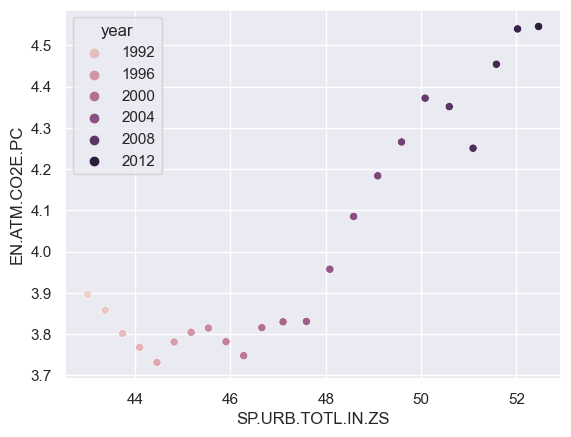

In [23]:
sns.scatterplot(wrld, x='SP.URB.TOTL.IN.ZS', y='EN.ATM.CO2E.PC', hue='year')

Видим, что:
- По миру с каждым годом растет процент городского населения
- Количество выбросов CO2 на душу населения растет

### Корреляция года и процента городского населения

In [27]:
def get_correlation(df):
    return df[['SP.URB.TOTL.IN.ZS', 'year']].corr().iloc[0, 1]

country_correlation = df_pivot.groupby('country_code').apply(get_correlation)

country_correlation = country_correlation.reset_index(name='correlation')
country_correlation.dropna(inplace=True)
country_correlation.sort_values('correlation', ascending=False, inplace=True)
country_correlation = country_correlation.merge(meta_country_df, left_on='country_code', right_on='Country Code')
country_correlation = country_correlation[['country_code', 'correlation', 'TableName', 'IncomeGroup']]


def is_CO2_col_valid(country_code):
    mask = df_pivot['country_code'] == country_code
    df = df_pivot[mask]
    return df['EN.ATM.CO2E.PC'].notna().mean() > 0.7
valid_mask = country_correlation['country_code'].transform(is_CO2_col_valid)
country_correlation = country_correlation[valid_mask]

country_correlation

country_code  correlation               TableName          IncomeGroup
0            BIH     0.999988  Bosnia and Herzegovina  Upper middle income
1            CMR     0.999981                Cameroon  Lower middle income
2            GIN     0.999967                  Guinea           Low income
4            MMR     0.999922                 Myanmar  Lower middle income
5            COG     0.999888             Congo, Rep.  Lower middle income
..           ...          ...                     ...                  ...
250          EST    -0.994179                 Estonia          High income
251          KNA    -0.997537     St. Kitts and Nevis          High income
253          AUT    -0.999525                 Austria          High income
254          MUS    -0.999701               Mauritius  Upper middle income
255          LKA    -0.999994               Sri Lanka  Lower middle income

[236 rows x 4 columns]

In [28]:
fig = px.choropleth(country_correlation, locations='country_code', color='correlation',
                    projection='natural earth')
fig.update_layout(title='Correlation between year and % of urban population',
                  geo=dict(
                      showcoastlines=True,
                      showland=True,
                      landcolor='rgb(243, 243, 243)',
                      countrycolor='white'),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

### Визализируем зависимость год ~ выброс CO2 для стран с разной корреляцией прироста городоского населения от

Цель: Если мы увидим, что в зависимости с изменением корреляцией прироста городского населения от года изменится и выброс CO2, то гипотезу можно считать верной

Дополнительные условия: разобьем на данные на группы по уровню достатка. Может зависимость CO2 ~ % городского населения проявляет себя по разному в зависимости от уровня достатка страны


In [29]:
def select_correlation(n, desired_correlation, mask):
    df = country_correlation[mask].copy()
    df['distance'] = np.abs(df['correlation'] - desired_correlation)
    df['distance'] *= -1
    largest = df.nlargest(n, 'distance')
    return largest.drop('distance', axis=1)

In [30]:
def visualize(income_group, desired_correlation):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))
    mask = country_correlation['IncomeGroup'] == income_group
    df = select_correlation(2, desired_correlation, mask)
    for ind, (_, row) in enumerate(df.iterrows()):
        country_code = row['country_code']
        country_name = row['TableName']
        correlation = row['correlation']
        ax = axis[ind]
        mask = df_pivot['country_code'] == country_code
        sns.regplot(df_pivot[mask], x='year', y='EN.ATM.CO2E.PC', ax=ax)
        ax.set_title(f'year~urban population%={correlation:.2f}; country={country_name}')
    fig.suptitle(f'income group={income_group}')
    axis[0].set_ylabel('CO2 per capita')
    axis[1].set_ylabel('')


incomes = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

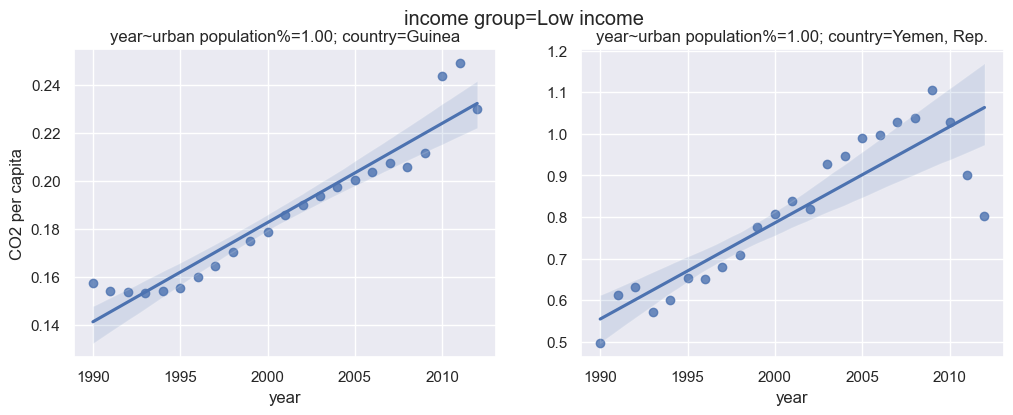

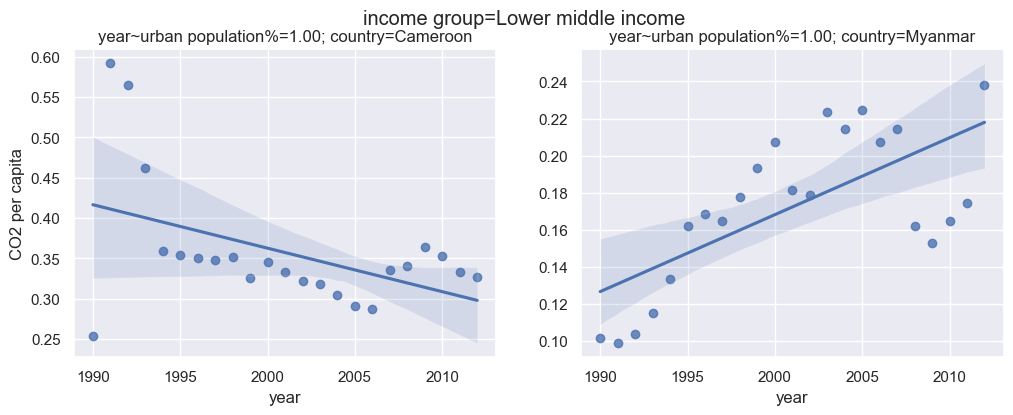

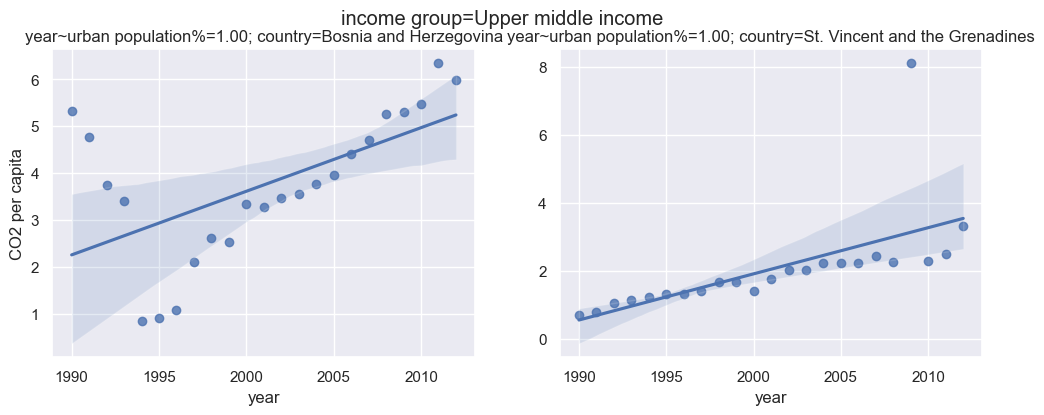

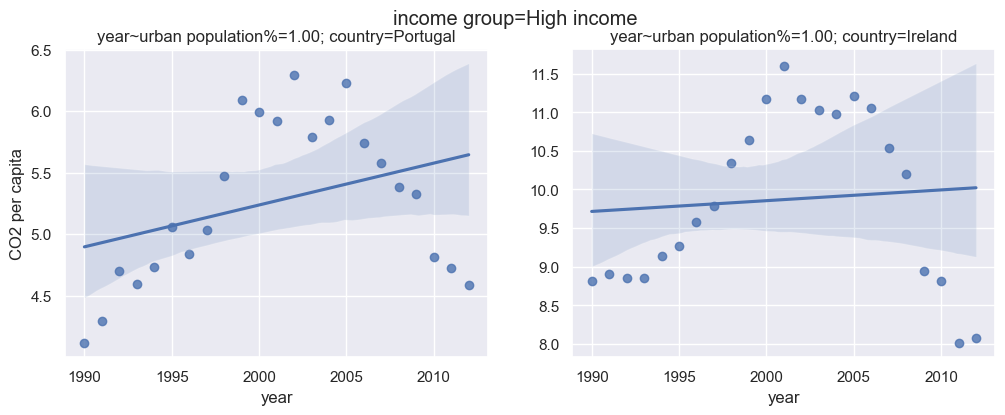

In [31]:
for income in incomes:
    visualize(income, 1)

Анализ:
* В Low сильная корреляция
* В Lower Middle встречаемся противоположными влияниями
* В Upper middle положительная корреляция
* В High видим параболу. То есть прямой зависимости нет.
    Это может быть вызвана тем, что страны с высоким доходом тратят средства на снижение выбросов CO2 в атмосферу


Вывод:
* С большей долей вероятности гипотеза в исходном ее виде непригодна. Возможно она будет более правдоподобна, если мы будем говорить только об одной группе доходов
* После 2007 года в high сегменте наблюдается снижение CO2

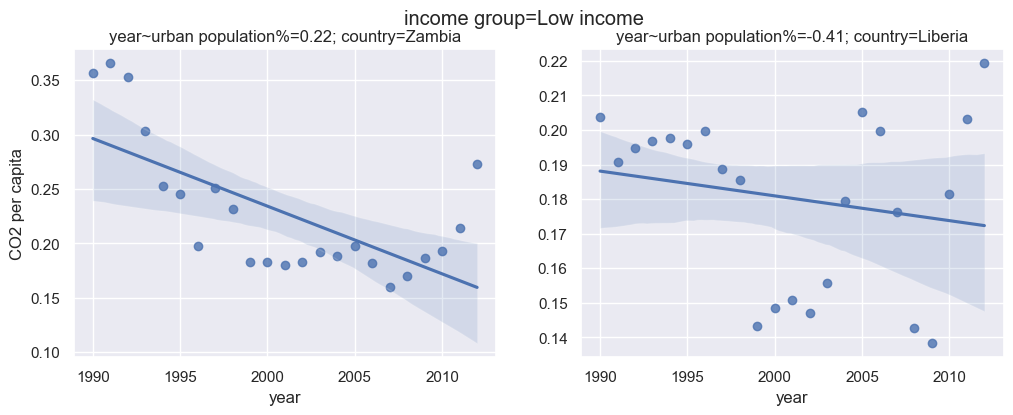

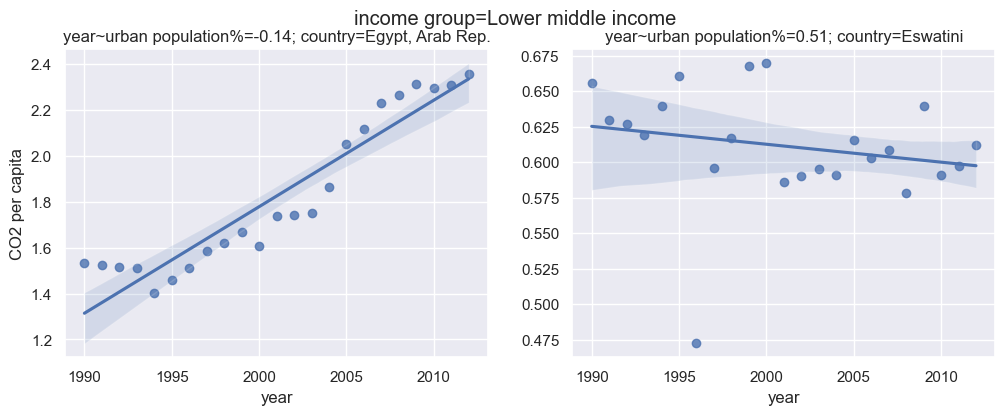

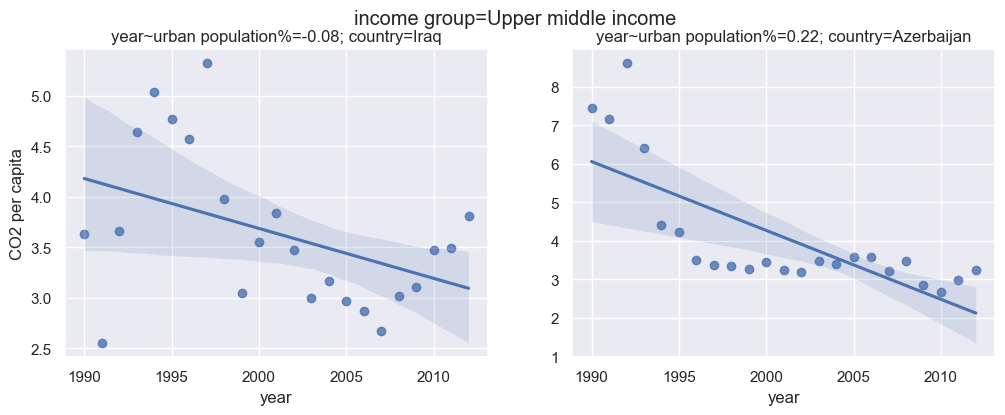

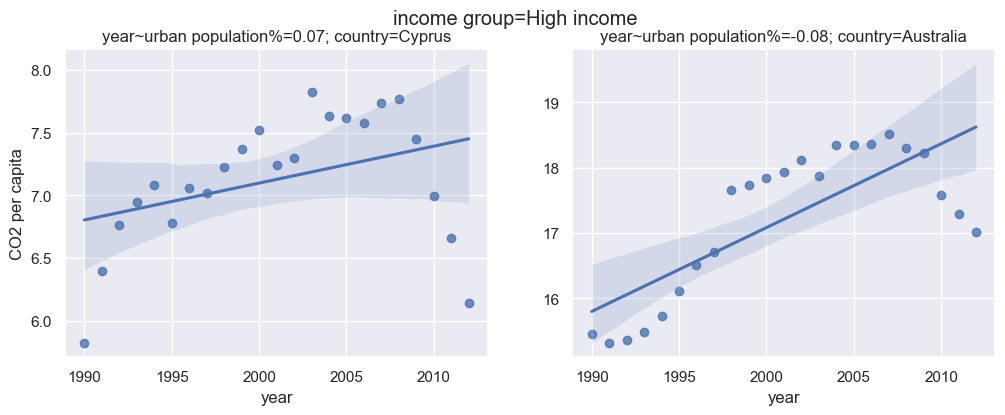

In [32]:
for income in incomes:
    visualize(income, 0)

Анализ:
* Low: несильный отрицательный тренд
* Lower middle: диаметральные ситуации. Один имеет сильную положительную, другой слабую отрицательный
* Upper middle: Слабый отрицательный тренд
* High: Слабый положительный

Вывод:
* Выраженность зависимости стала слабее, что частично подтверждает гипотезу. Однако, в частных случаях наблюдается нарушение прямой зависимости.
* Продолжает наблюдаться тренд с уменьшением выбросов в странах с большим доходом, начиная с ~2008 года

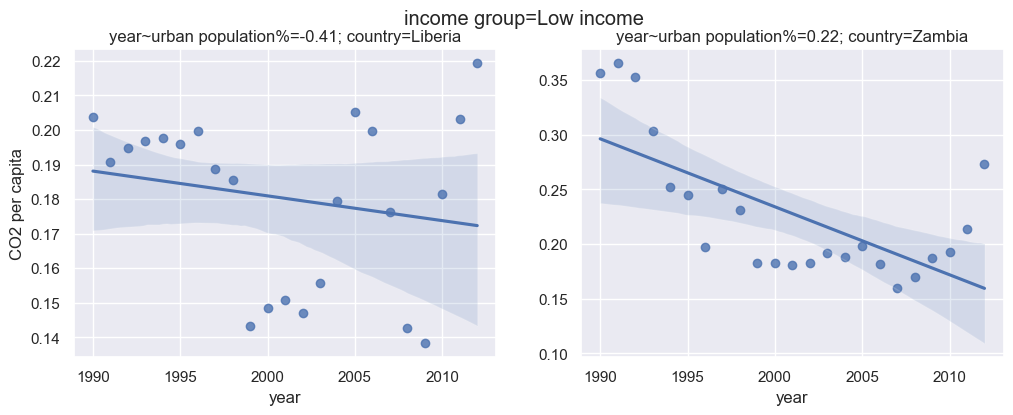

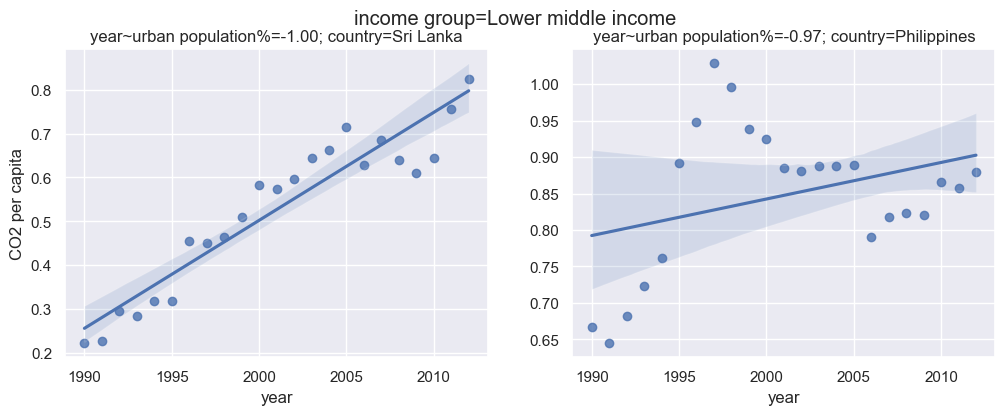

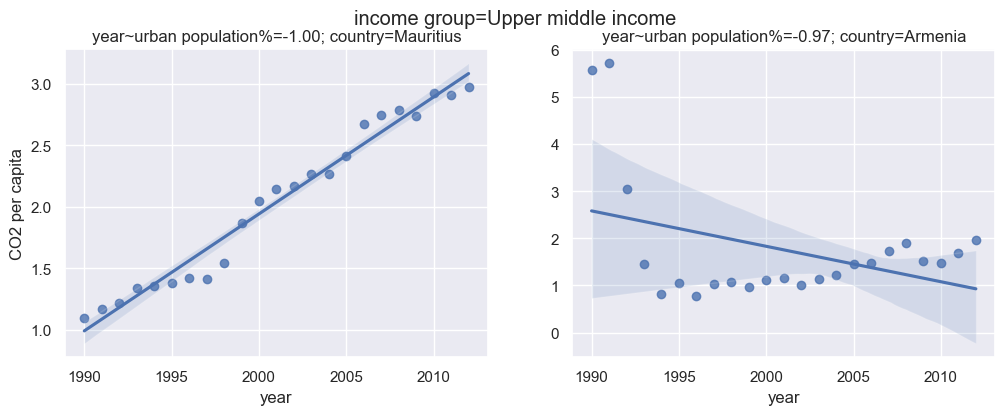

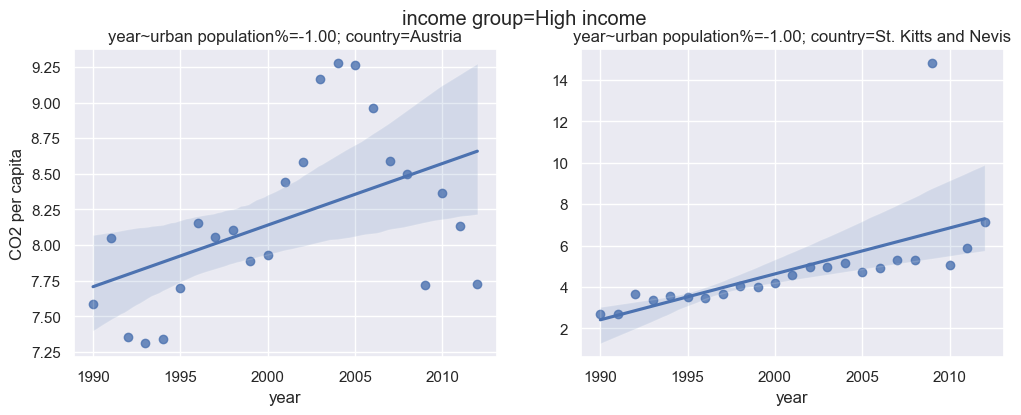

In [33]:
for income in incomes:
    visualize(income, -1)

Анализ:
* Видим, что у Low выбраны страны как и в случае с 0. Это объясняется тем, что в группе с Low Income нет стран с отрицательным процентом сельского населения.
* Lower middle: В Sri Lanka сильный положительный тренд. В Phillipines практически отсутствуют изменения
* Upper middle: Диаметральная ситуация. Mauritius - сильный положительны тренд. Armenis - слабая зависимость
* High: у Australia наблюдается тенденция к снижению выбросов после ~2007 года. St. Kitts and Nevis сильный положительный тренд.


Вывод:
* У бедных стран высокий прирост городского населения
* Наблюдается большое количество сильных положительных трендов вне зависимости от прибыли страны, что разрушает гипотезу.
* Сохраняется тренд на уменьшение выбросов CO2 для стран с высоким достатком

### Вывод

Гипотеза "Чем больше темпы роста урбанизации страны, тем больше выброс CO2 в атмосферу" - неверна

Более конкретные гипотезы взамен текущей:
* Сектор Low Income имеет высокие темпы урбанизации
* Высокие темпы урабнизации критичны только для Low Income сектора, потому что у них не инвестируют средства в защиту окружающей среды
* Страны сегмента High Income имеют тенденцию к снижению выброса CO2 после 2007 года, что связано с более рациональным использованием энергии


## Сектор Low Income имеет высокие темпы урбанизации

### Данные по агрегации

<Axes: xlabel='year', ylabel='SP.URB.TOTL.IN.ZS'>

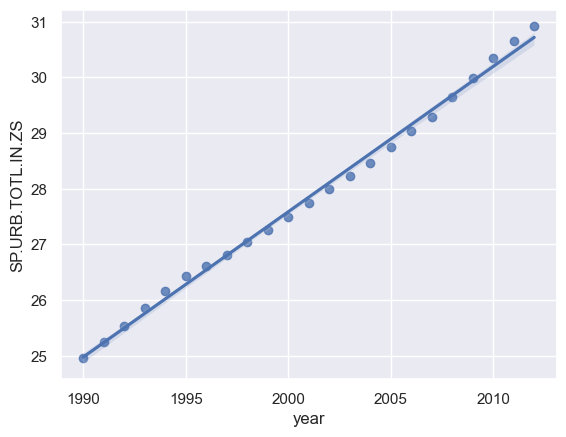

In [34]:
mask = df_pivot['country_name'] == 'Low income'
sns.regplot(data=df_pivot[mask], x='year', y='SP.URB.TOTL.IN.ZS')

Видим практически идеальную корреляцию

### В сравнении с другими секторами

Из предыдущего пункта мы поняли, что в Low Income практически отсутствуют страны с низким или отрицательным темпом урбанизации.

Проверим нашу гипотезу, сравнив со странами из других сегментов.

In [35]:

fig = go.Figure()

for income in incomes:
    data = country_correlation[country_correlation['IncomeGroup'] == income]
    fig.add_trace(go.Histogram(x=data['correlation'],
                               nbinsx=15,
                               name=income,
                               histnorm='probability'))

fig.update_layout(margin=dict(l=0, r=0, t=30, b=0),
                  title='distribution of year~urban_population_% correlation')

Вывод: тренд роста урбанизации выражен во всех категориях, но наиболее ярко он проявляется в Low income

### Используем Violin и Box Plot для более прицельной проверки гипотезы

Text(0.5, 0, '% of urban population')

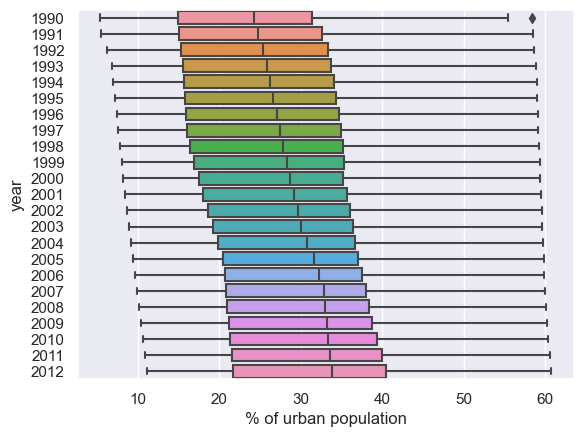

In [36]:
plt.Figure(figsize=(3, 10))

mask = df_pivot['IncomeGroup'] == 'Low income'
low_income = df_pivot[mask]
sns.boxplot(low_income, x='SP.URB.TOTL.IN.ZS', y='year', orient='h')
plt.xlabel('% of urban population')

Видно, что общий тренд положительный

Что можно еще сделать? Разделить на квартили по начальным суммам и визуализировать box plot

### Вывод

Гипотеза верна

# Проработка гипотез Алексей Безгин

In [38]:
for val in ['East Asia & Pacific (IDA & IBRD countries)',  'Europe & Central Asia (IDA & IBRD countries)',
                         'Latin America & the Caribbean (IDA & IBRD countries)',  'Middle East & North Africa (IDA & IBRD countries)',
                         'Sub-Saharan Africa (IDA & IBRD countries)']:

    region_aggregate.add(val)

In [39]:
countries = set(df_pivot['country_name']).difference(set(all_without_region).union(set(region_aggregate)))

In [40]:
# all_without_region

In [41]:
# region_aggregate

C:\Users\vsevolod026\AppData\Local\Temp\ipykernel_14220\83079735.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Correlation coefficient: -0.20


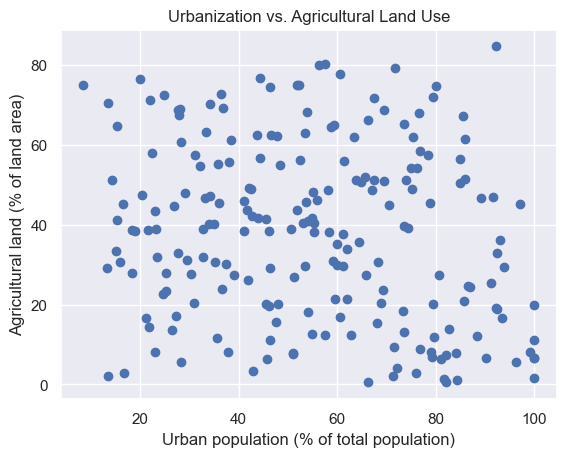

In [42]:
# 1. Countries with higher urban populations have lower agricultural land as a percentage of their total land area

# Не подтвердилась!


# Group the data by country and calculate the mean values for each column
grouped = df_pivot[df_pivot['country_name'].isin(countries)].groupby('country_name').mean()

# Create a scatter plot of urban population percentage vs. agricultural land percentage
plt.scatter(grouped['SP.URB.TOTL.IN.ZS'], grouped['AG.LND.AGRI.ZS'])
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Agricultural land (% of land area)')
plt.title('Urbanization vs. Agricultural Land Use')

# Calculate and print the correlation coefficient
correlation = grouped['SP.URB.TOTL.IN.ZS'].corr(grouped['AG.LND.AGRI.ZS'])
print(f'Correlation coefficient: {correlation:.2f}')

# Show the plot
plt.show()
None

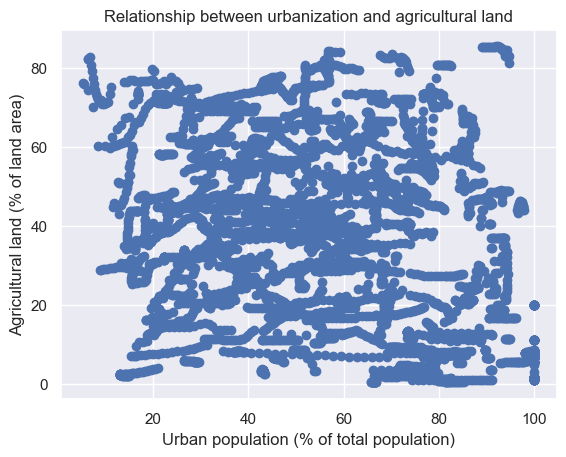

In [43]:
# 2. Countries with higher levels of urbanization have lower levels of agricultural land as a percentage of total land area.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['SP.URB.TOTL.IN.ZS'], df_pivot[df_pivot['country_name'].isin(countries)]['AG.LND.AGRI.ZS'])
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Agricultural land (% of land area)')
plt.title('Relationship between urbanization and agricultural land')
plt.show()


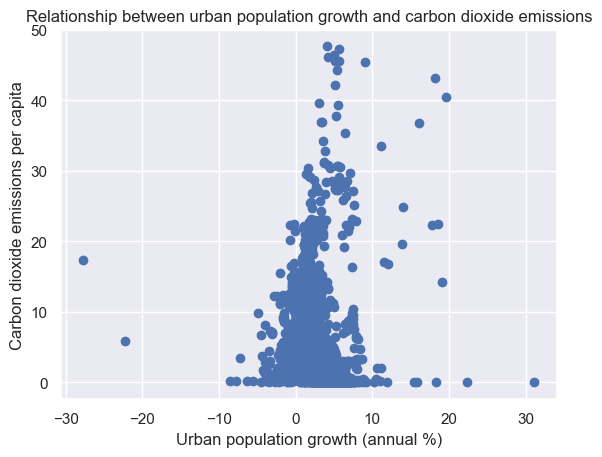

In [44]:
# 3. Countries with higher levels of urban population growth tend to have higher levels of carbon dioxide emissions per capita.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['SP.URB.GROW'], df_pivot[df_pivot['country_name'].isin(countries)]['EN.ATM.CO2E.PC'])
plt.xlabel('Urban population growth (annual %)')
plt.ylabel('Carbon dioxide emissions per capita')
plt.title('Relationship between urban population growth and carbon dioxide emissions')
plt.show()

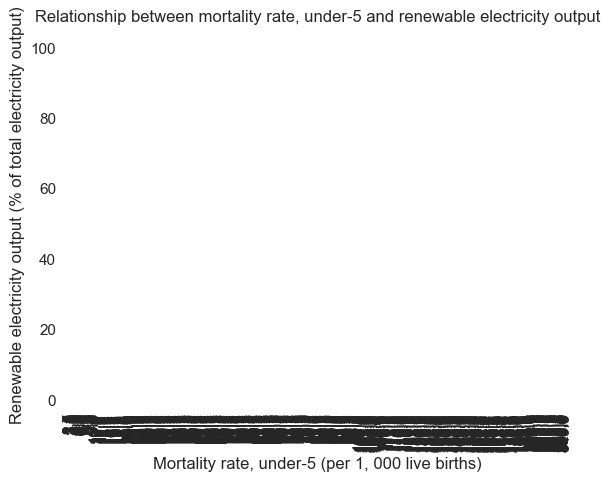

In [45]:
# 4. Countries with higher levels of mortality rate, under-5 tend to have lower levels of electricity production from renewable sources.

# булщит

df_pivot[df_pivot['country_name'].isin(countries)].groupby('SH.DYN.MORT')['EG.ELC.RNEW.ZS'].mean().plot(kind='bar')
plt.xlabel('Mortality rate, under-5 (per 1, 000 live births)')
plt.ylabel('Renewable electricity output (% of total electricity output)')
plt.title('Relationship between mortality rate, under-5 and renewable electricity output')
plt.show()

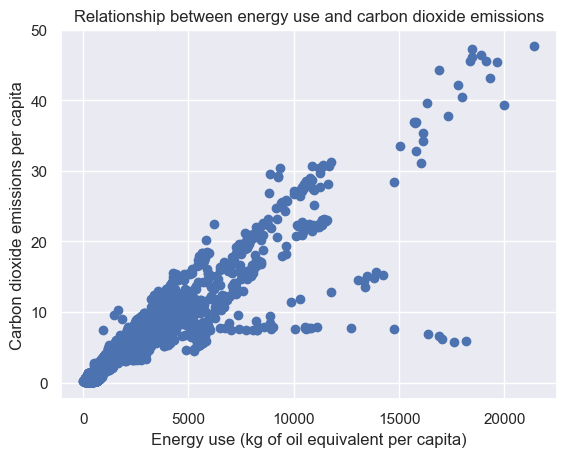

In [46]:
# 5. Countries with higher levels of energy use per capita tend to have higher levels of carbon dioxide emissions per capita.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['EG.USE.PCAP.KG.OE'], df_pivot[df_pivot['country_name'].isin(countries)]['EN.ATM.CO2E.PC'])
plt.xlabel('Energy use (kg of oil equivalent per capita)')
plt.ylabel('Carbon dioxide emissions per capita')
plt.title('Relationship between energy use and carbon dioxide emissions')
plt.show()

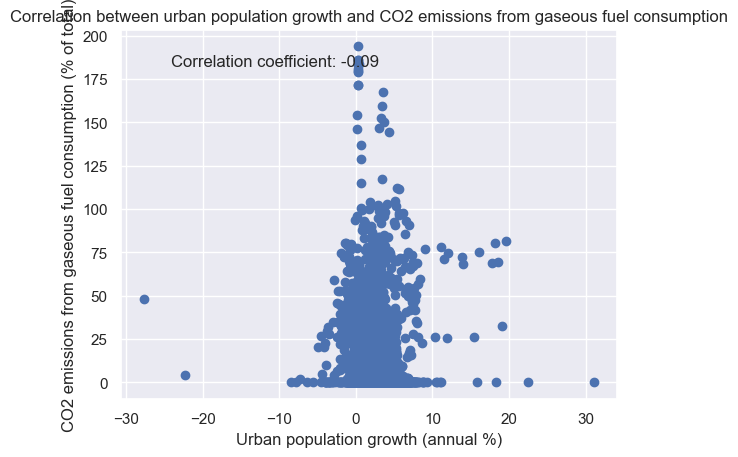

In [47]:
# 6. Is there a correlation between a country's urban population growth and its CO2 emissions from gaseous fuel consumption?

data = df_pivot[df_pivot['country_name'].isin(countries)][['SP.URB.GROW', 'EN.ATM.CO2E.GF.ZS']]
data = data.dropna()

corr = data['SP.URB.GROW'].corr(data['EN.ATM.CO2E.GF.ZS'])

# Plot the data
plt.scatter(data['SP.URB.GROW'], data['EN.ATM.CO2E.GF.ZS'])
plt.xlabel('Urban population growth (annual %)')
plt.ylabel('CO2 emissions from gaseous fuel consumption (% of total)')
plt.title('Correlation between urban population growth and CO2 emissions from gaseous fuel consumption')
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

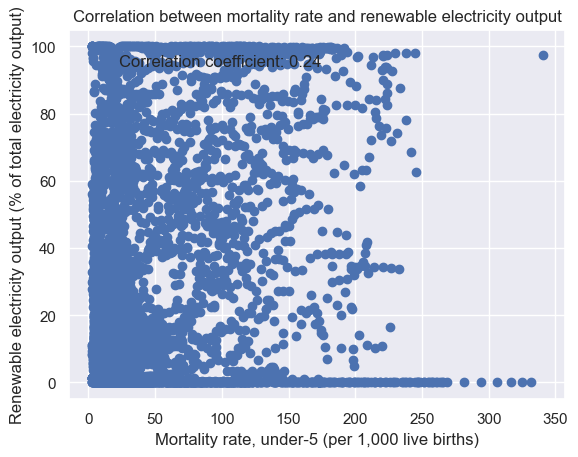

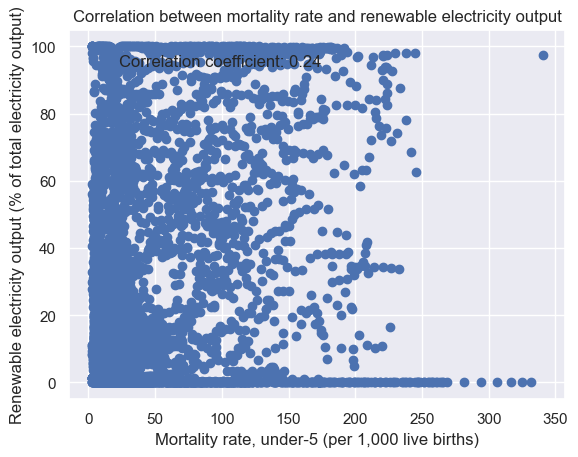

In [49]:
# 7. Do countries with higher mortality rates for children under 5 years of age tend to have lower percentages of renewable electricity output?

# Filter the data for the desired columns
data = df_pivot[df_pivot['country_name'].isin(countries)][['SH.DYN.MORT', 'EG.ELC.RNEW.ZS']]

# Drop any rows with missing values
data = data.dropna()

# Calculate the correlation coefficient
corr = data['SH.DYN.MORT'].corr(data['EG.ELC.RNEW.ZS'])

# Plot the data
plt.scatter(data['SH.DYN.MORT'], data['EG.ELC.RNEW.ZS'])
plt.xlabel('Mortality rate, under-5 (per 1,000 live births)')
plt.ylabel('Renewable electricity output (% of total electricity output)')
plt.title('Correlation between mortality rate and renewable electricity output')
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()